# Seminar 6 - Linear Regression

## Simple linear regression

The “Old Faithful” geyser is located at Yellowstone National Park in Wyoming, USA. 

The data set contains a sample of 272 inter-eruption times taken during August 1978 and August
1979. The variables are - the index of the date when the observation was taken, eruptions (the
duration of an eruption of the geyser in minutes), and waiting (the time until the next eruption
in minutes).

### Tasks
1. Create a boxplot and a frequency histogram of the inter-eruption time. Can we assume that
its distribution is approximately normal?

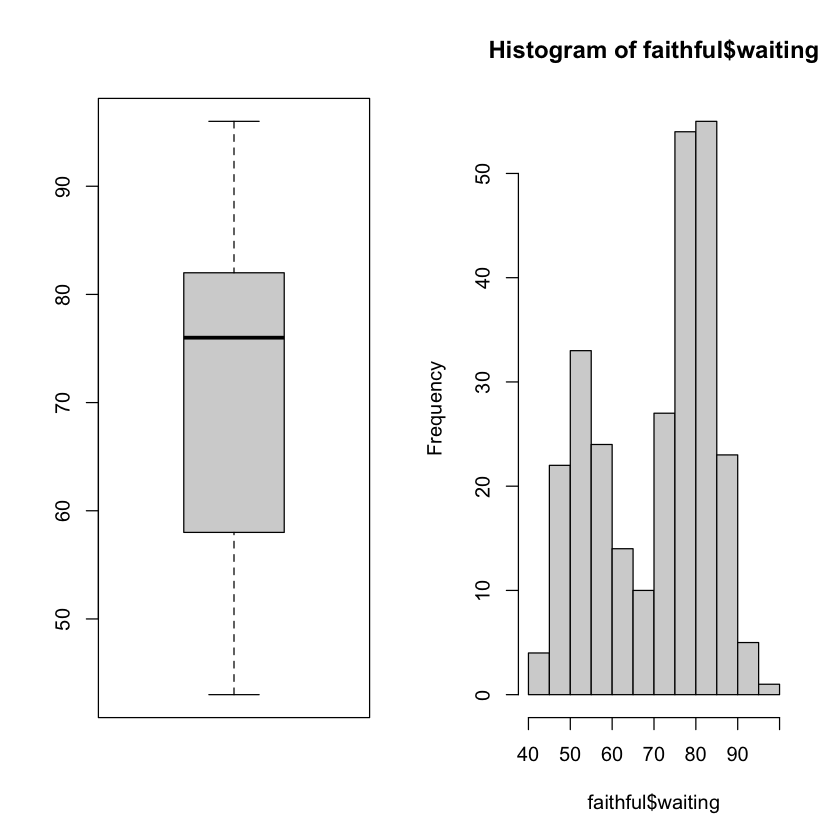

In [48]:
par(mfrow = c(1, 2))
boxplot(faithful$waiting)
hist(faithful$waiting)
# No we can't say its normal

2. Make a scatterplot of eruption duration (on Y-axis) vs waiting time (on X-axis). Which
additional features of the data can you see on the plot?

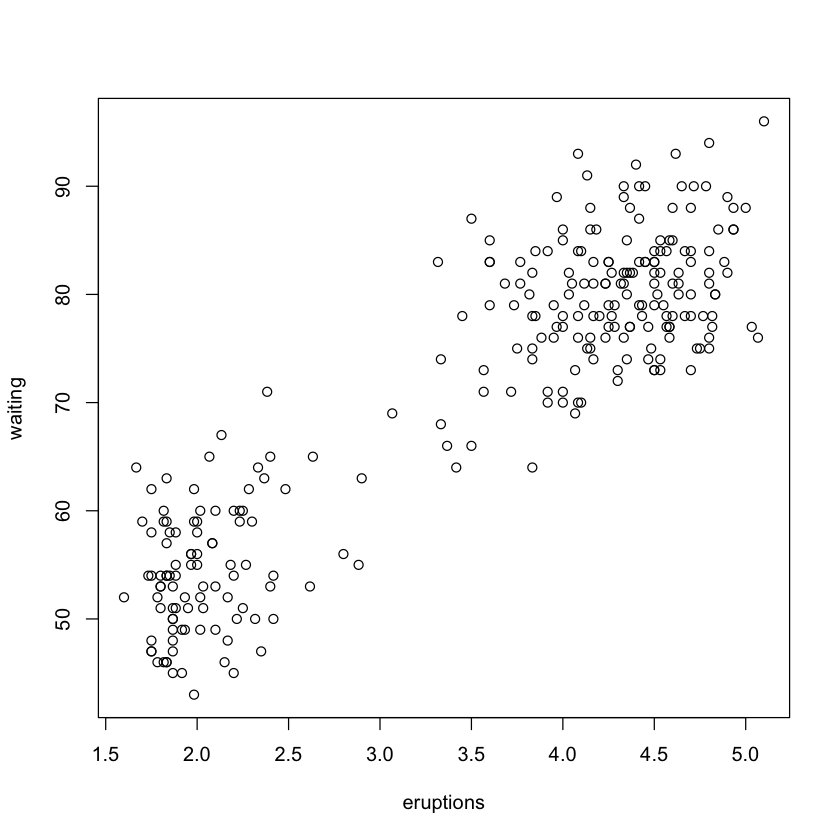

In [49]:
# library("ggplot2")
# ggplot(faithful) +
#     geom_point(mapping = aes(x = waiting, y = eruptions))

plot(waiting ~ eruptions, data = faithful)

3. Why, to your opinion, shorter inter-eruption times are associated with shorter eruption
times and longer inter-eruption times are associated with longer eruption times?
4. Fit the simple linear regression between duration and waiting time and add the resulting regression line to the scatter plot above. Check the regression assumptions about the residuals
and comment on the model fit.

[1] "34.9755075785807 34.8464466650066"
[1] "Error 0.129060913574051"


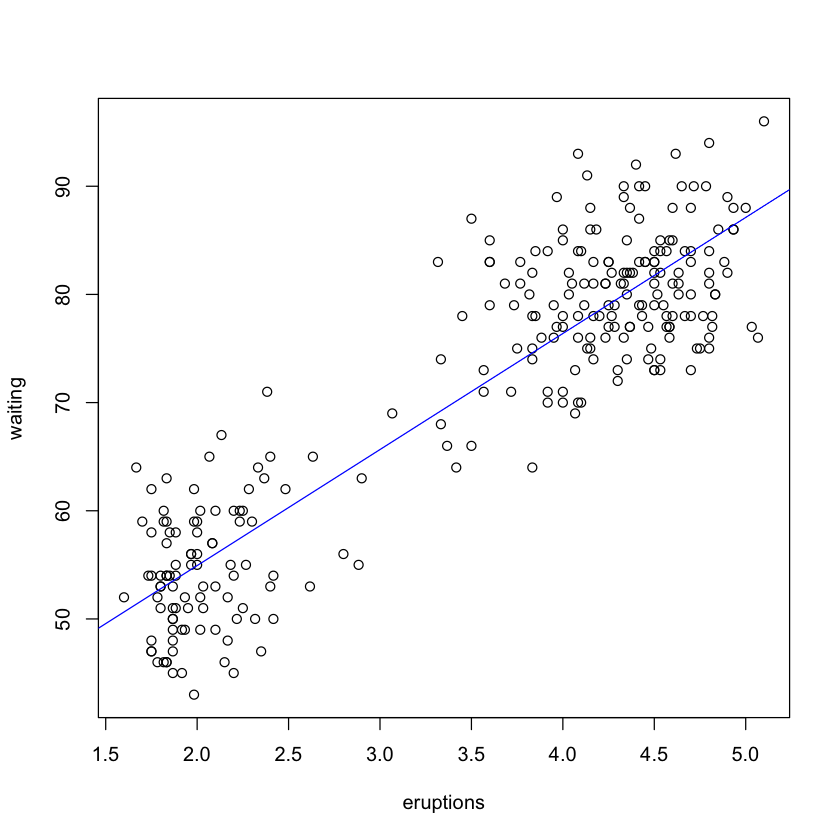

In [109]:
m <- lm(waiting ~ eruptions, data = faithful)

plot(waiting ~ eruptions, data = faithful)
abline(a = m$coefficients[1], b = m$coefficients[2], col = "blue")

est_waiting <- predict.lm(m, faithful)
s_ <- sum((faithful$waiting - est_waiting) ^ 2) / (nrow(faithful) - 2)
sd <- var(m$residuals)

print(paste(s_, sd))
print(paste("Error", s_ - sd))

## Parametric bootstrap for a regression model

In [241]:
set.seed(1234)

In [242]:
bootstrap_seq <- function(df, N = 1000) {
    b0_bseq <- c()
    b1_bseq <- c()
    
    for (i in 1:N) {
      samples = df[sample(1:nrow(df), nrow(df), replace = TRUE), ]
      
      m_boot <- lm(waiting ~ eruptions, data = samples)

      b0_bseq <- c(b0_bseq, m_boot$coefficients[1])
      b1_bseq <- c(b1_bseq, m_boot$coefficients[2])
    }

    list(b0 = b0_bseq, b1 = b1_bseq)
}

In [243]:
faithful_sub = subset(faithful, eruptions < 3.0)
m_init <- lm(waiting ~ eruptions, data = faithful_sub)
boot <- bootstrap_seq(faithful_sub)

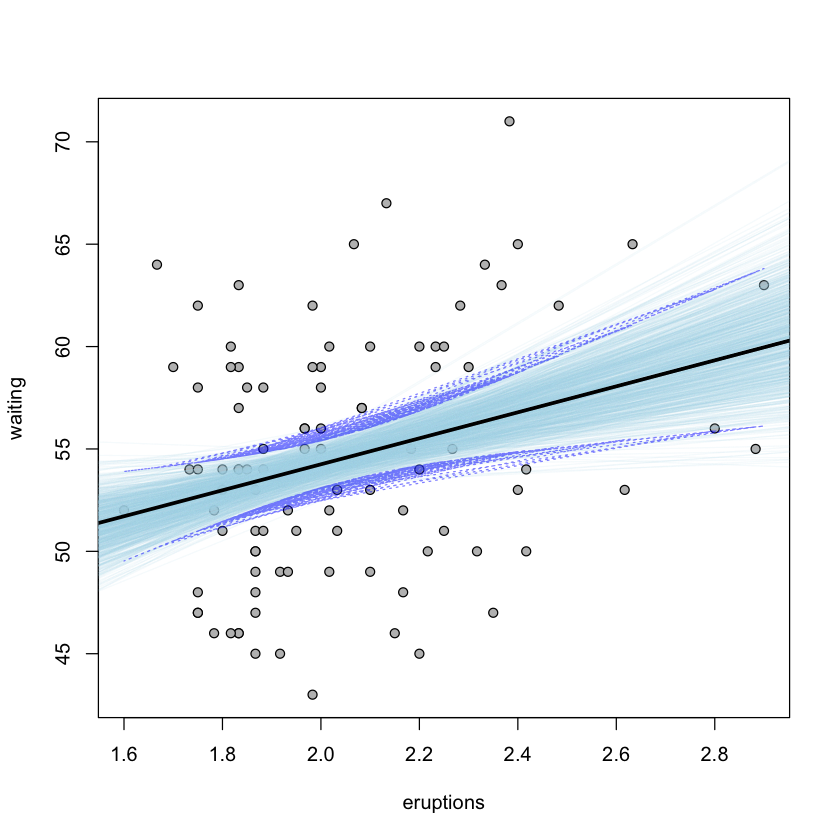

In [244]:
plot(waiting ~ eruptions, data = faithful_sub, pch = 21, bg="grey")
for (i in 1:1000) {
    abline(a = boot$b0[i], b = boot$b1[i], col = adjustcolor("lightblue", alpha = 0.1))
}

abline(a = m_init$coefficients[1], b = m_init$coefficients[2], col = "black", lwd = 3)

ci <- predict(m_init, newdata = faithful_sub, interval = "confidence", level = 0.95)
lines(faithful_sub$eruptions, ci[, 2], col = adjustcolor("blue", alpha = 0.5), lty = 3)
lines(faithful_sub$eruptions, ci[, 3], col = adjustcolor("blue", alpha = 0.5), lty = 3)

### Practice Test

#### Question 2
Let (x1, y1), (x2,y2),..., (x5, y5) be five independent observations from a normally distributed random vector (X,Y). The summary statistics are given.
Based on the provided information, the regression line of Y versus X has the slope ???  and the intercept ???

In [245]:
reg_cov = function(s2xy, s2x, s2y, ux, uy) {
    k <- s2xy / s2x
    c <- uy - (k * ux)
    
    list(k = k, c = c)
}

reg_cov(
    s2xy = 5.8,
    s2x = 2.5,
    s2y = 14.098,
    ux = 3.0,
    uy = 6.14
)

$k
[1] 2.32

$c
[1] -0.82

#### Question 3
The table contains five independent observations from a normally distributed random vector (X,Y). What percent of variability in the data can be explained by the linear regression model for Y versus X? Round the answer to the closest integer.

| X | y    |
| - | ---- |
| 1 | 1.2  |
| 2 | 4.2  |
| 3 | 5.0  |
| 4 | 9.9  |
| 5 | 10.4 |

In [246]:
df <- data.frame(
    X = c(1, 2, 3, 4, 5), 
    y = c(1.2, 4.2, 5.0, 9.9, 10.4))
df

# Find Coeff of Determination: R-Squared
m_xy = lm(X ~ y, df)
summary(m_xy)
summary(m_xy)$r.squared

X,y
<dbl>,<dbl>
1,1.2
2,4.2
3,5.0
4,9.9
5,10.4



Call:
lm(formula = X ~ y, data = df)

Residuals:
       1        2        3        4        5 
-0.07206 -0.24287  0.44491 -0.46742  0.33745 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.60374    0.40076   1.506  0.22903   
y            0.39027    0.05665   6.889  0.00626 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4451 on 3 degrees of freedom
Multiple R-squared:  0.9406,	Adjusted R-squared:  0.9207 
F-statistic: 47.46 on 1 and 3 DF,  p-value: 0.006265


[1] 0.9405525